<a href="https://colab.research.google.com/github/syh0397/User_analysis_elec/blob/main/2_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
#
import scipy.stats as stats
#
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [3]:
#한글 나눔 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [18]:
df= pd.read_csv('/content/drive/MyDrive/data/e_commerce.csv')
df

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion
0,0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06,electronics,telephone,NaN,2020-09-24 11:57:06,0 days 00:01:17,False,150.0000,New,new
1,1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler,2020-09-24 11:57:26,0 days 00:17:45,False,1392.0000,New,new
2,2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27,NaN,NaN,NaN,2020-09-24 11:57:27,3 days 01:03:40,New,13454.0000,New,new
3,3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.8100,1515915625519014356,aGFYrNgC08,2020-09-24,11:57:33,computers,peripherals,printer,2020-09-24 11:57:33,2 days 03:21:40,New,516.0000,New,new
4,4,2020-09-24 11:57:36,view,3658723,2144415921169498184,NaN,cameronsino,15.8700,1515915625510743344,aa4mmk0kwQ,2020-09-24,11:57:36,NaN,NaN,NaN,2020-09-24 11:57:36,11 days 22:16:15,New,6274.0000,New,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885124,885124,2021-02-28 23:55:01,view,953226,2144415927553229037,NaN,NaN,219.9400,1515915625611023730,FRLqIttxKU,2021-02-28,23:55:01,NaN,NaN,NaN,2021-02-28 23:55:01,0 days 00:03:04,False,59.0000,New,new
885125,885125,2021-02-28 23:58:05,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.0300,1515915625611024014,g6WqPf50Ma,2021-02-28,23:58:05,electronics,video,tv,2021-02-28 23:58:05,0 days 00:00:04,False,284.0000,New,new
885126,885126,2021-02-28 23:58:09,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.9200,1515915625611024020,xNIJBqZdkd,2021-02-28,23:58:09,electronics,clocks,NaN,2021-02-28 23:58:09,0 days 00:00:05,False,6.0000,New,new
885127,885127,2021-02-28 23:58:14,view,888273,2144415921932861531,electronics.telephone,NaN,10.1600,1515915625611024030,9pCbKMIcSx,2021-02-28,23:58:14,electronics,telephone,NaN,2021-02-28 23:58:14,NaN,False,10.0000,New,new


#### 1. 일별 고유 세션 수

- 일별 전체 세션 

In [19]:
date_allnew = df.groupby(['date','New_sessoion'],as_index=False).size()
date_allnew = date_allnew.pivot(index='date',columns='New_sessoion',values='size').fillna(0)
date_allnew

New_sessoion,exist,new
date,,
2020-09-24,718,1547
2020-09-25,1415,2826
2020-09-26,1218,2247
2020-09-27,1414,2437
2020-09-28,1685,3029
...,...,...
2021-02-24,2919,2884
2021-02-25,2952,2695
2021-02-26,3014,2850


In [20]:
date_allnew.new.describe().to_frame()

,new
count,158.0000
mean,3102.5949
std,517.8032
min,1461.0000
25%,2785.0000
50%,3048.0000
75%,3441.0000
max,4515.0000


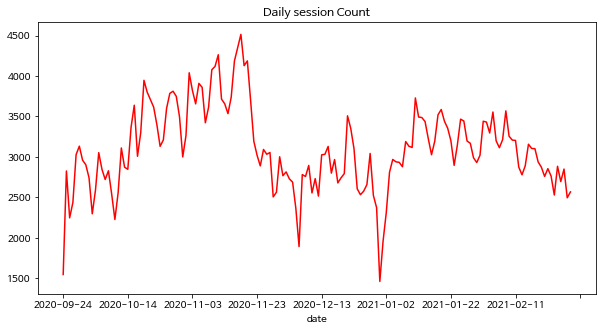

In [21]:
plt.figure(figsize=(10,5))
plt.title("Daily session Count")
date_allnew.new.plot(c='r');

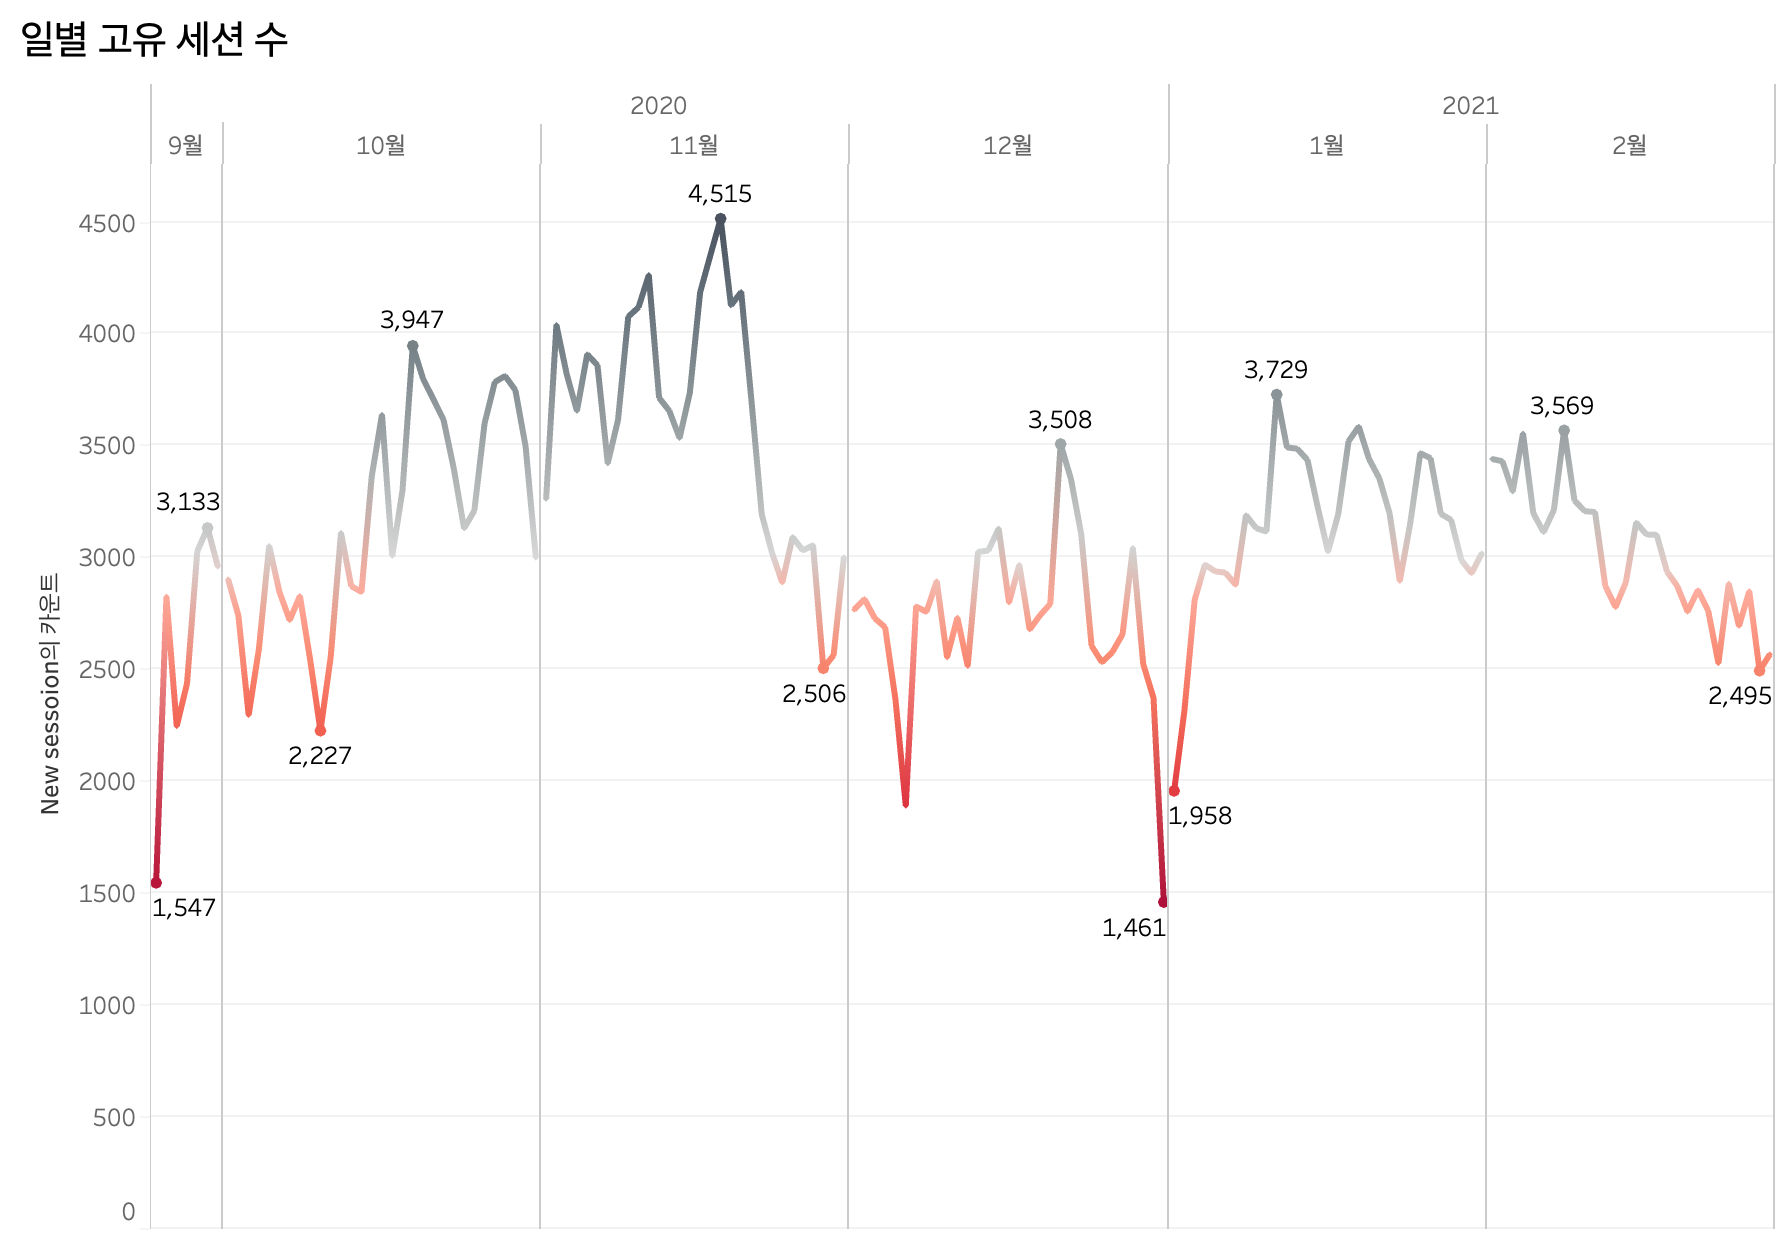

#### 2. 일별 전체 세션 대비 신규 세션 비율 

- (처음 방문한 세션을 신규 세션으로 정의합니다.)

- 일별 신규세션

In [22]:
date_new = df.groupby(['date','new_session'],as_index=False).size()
date_new = date_new.pivot(index='date',columns='new_session',values='size').fillna(0)
date_new

new_session,False,New
date,,
2020-09-24,907,1358
2020-09-25,1858,2383
2020-09-26,1558,1907
2020-09-27,1808,2043
2020-09-28,2182,2532
...,...,...
2021-02-24,3336,2467
2021-02-25,3304,2343
2021-02-26,3341,2523


- date_new 일별 신규세션
- date_allnew 일별 전체 세션  

In [23]:
rate = date_new.New / date_allnew.new

In [24]:
rate.to_frame()

,0
date,
2020-09-24,0.8778
2020-09-25,0.8432
2020-09-26,0.8487
2020-09-27,0.8383
2020-09-28,0.8359
...,...
2021-02-24,0.8554
2021-02-25,0.8694
2021-02-26,0.8853


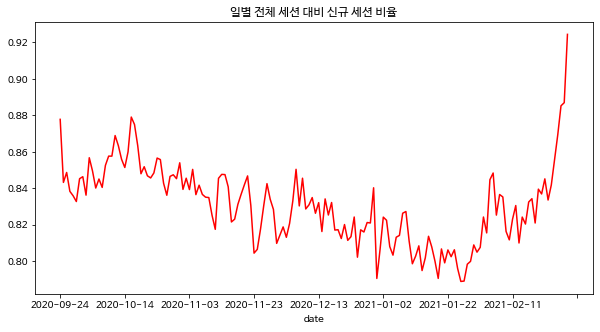

In [25]:
plt.figure(figsize=(10,5))
plt.title("일별 전체 세션 대비 신규 세션 비율")
rate.plot(c='r');

#### 3. 일별 세션 체류시간의 분포 
- (한 세션이 시작되고 끝나기까지의 시간을 체류시간으로 정의합니다.)

In [35]:
df_ = df.copy()
df_sorted = df_.sort_values(by=['user_id', 'date'] ,ascending=True)
df_sorted.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion
174670,174670,2020-10-29 11:28:35,view,4101974,2144415939364389423,electronics.clocks,honor,76.4800,1515915625353226922,7qejzWzHlR,2020-10-29,11:28:35,electronics,clocks,NaN,2020-10-29 11:28:35,-24 days +19:01:57,False,1.0000,New,new
51155,51155,2020-10-06 06:30:32,view,3506650,2144415935673401802,NaN,kester,28.9800,1515915625353230067,ikPKHkuRhA,2020-10-06,06:30:32,NaN,NaN,NaN,2020-10-06 06:30:32,34 days 02:22:19,New,3145.0000,New,new
242211,242211,2020-11-09 08:52:51,view,124883,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,08:52:51,electronics,audio,acoustic,2020-11-09 08:52:51,0 days 00:11:43,False,616.0000,New,new
242297,242297,2020-11-09 09:04:34,view,760044,2144415924424278172,electronics.audio.acoustic,dell,48.7300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:04:34,electronics,audio,acoustic,2020-11-09 09:04:34,0 days 00:04:19,False,0.0000,False,exist
242335,242335,2020-11-09 09:08:53,view,125325,2144415924424278172,electronics.audio.acoustic,logitech,23.9000,1515915625353230683,dn9FkZ11dA,2020-11-09,09:08:53,electronics,audio,acoustic,2020-11-09 09:08:53,0 days 00:02:06,False,0.0000,False,exist
242344,242344,2020-11-09 09:10:59,view,461533,2144415924424278172,electronics.audio.acoustic,smartbuy,12.9400,1515915625353230683,dn9FkZ11dA,2020-11-09,09:10:59,electronics,audio,acoustic,2020-11-09 09:10:59,0 days 00:04:28,False,0.0000,False,exist
242379,242379,2020-11-09 09:15:27,view,1399881,2144415924424278172,electronics.audio.acoustic,sven,28.5200,1515915625353230683,dn9FkZ11dA,2020-11-09,09:15:27,electronics,audio,acoustic,2020-11-09 09:15:27,0 days 00:06:33,False,0.0000,False,exist
242419,242419,2020-11-09 09:22:00,view,1038457,2144415924424278172,electronics.audio.acoustic,bbk,16.8400,1515915625353230683,dn9FkZ11dA,2020-11-09,09:22:00,electronics,audio,acoustic,2020-11-09 09:22:00,0 days 00:03:34,False,0.0000,False,exist
242442,242442,2020-11-09 09:25:34,view,886608,2144415924424278172,electronics.audio.acoustic,perfeo,13.3200,1515915625353230683,dn9FkZ11dA,2020-11-09,09:25:34,electronics,audio,acoustic,2020-11-09 09:25:34,0 days 00:01:04,False,0.0000,False,exist
242448,242447,2020-11-09 09:26:38,view,3793158,2144415924424278172,electronics.audio.acoustic,canyon,10.0300,1515915625353230683,dn9FkZ11dA,2020-11-09,09:26:38,electronics,audio,acoustic,2020-11-09 09:26:38,9 days 01:24:57,New,0.0000,False,new


In [46]:
from datetime import timedelta

In [60]:
df_sorted['diff'] = pd.to_timedelta(df_sorted['diff'])
df_sorted['date_'] = pd.to_datetime(df_sorted['date_'])

- 방문당 체류시간 = 총 체류시간 / 총 세션 
    - 총 체류시간 max(date_) - min(date_)
- 일별 체류시간 = 일별 총 체류시간 / 일별 총 세션

In [70]:
date_allnew = df.groupby(['date','user_id']).agg({'date_': ['min', 'max']})
date_allnew

date_                     
                                                min                  max
date       user_id                                                      
2020-09-24 1515915625353555928  2020-09-24 15:55:03  2020-09-24 15:55:03
           1515915625353799274  2020-09-24 19:59:38  2020-09-24 19:59:38
           1515915625354082427  2020-09-24 17:53:45  2020-09-24 17:53:45
           1515915625354144974  2020-09-24 21:04:55  2020-09-24 22:00:31
           1515915625355752940  2020-09-24 18:33:00  2020-09-24 18:33:00
...                                             ...                  ...
2021-02-28 1515915625611023671  2021-02-28 23:54:18  2021-02-28 23:54:18
           1515915625611023730  2021-02-28 23:55:01  2021-02-28 23:55:01
           1515915625611024014  2021-02-28 23:58:05  2021-02-28 23:58:05
           1515915625611024020  2021-02-28 23:58:09  2021-02-28 23:58:09
           1515915625611024030  2021-02-28 23:58:14  2021-02-28 23:58:14

[467039 rows x 2 columns]

#### 4. 일별 구매 전환율 

- (구매한 세션 / 전체 세션을 구매 전환율로 정의합니다.)



#### 5. 일별 퍼널 단계별 전환율 

- (event_type의 view, cart, purchase를 퍼널 단계로 정의합니다.)

In [71]:
conversion_rate = df.groupby(['date','event_type'],as_index=False).size()
conversion_rate = conversion_rate.pivot(index='date',columns='event_type',values='size').fillna(0)
conversion_rate

event_type,cart,purchase,view
date,,,
2020-09-24,99,84,2082
2020-09-25,240,149,3852
2020-09-26,177,119,3169
2020-09-27,172,110,3569
2020-09-28,259,200,4255
...,...,...,...
2021-02-24,413,292,5098
2021-02-25,411,248,4988
2021-02-26,416,275,5173


In [81]:
cart_ = conversion_rate.cart/conversion_rate.view
purchase_ = conversion_rate.purchase/conversion_rate.cart
cart_ = cart_.to_frame()
purchase_ = purchase_.to_frame()

In [94]:
conversion_ = pd.concat([cart_, purchase_], axis=1)
conversion_.columns = ['to_cart', 'to_purchase']
conversion_ = conversion_.reset_index()
conversion_

,date,to_cart,to_purchase
0,2020-09-24,0.0476,0.8485
1,2020-09-25,0.0623,0.6208
2,2020-09-26,0.0559,0.6723
3,2020-09-27,0.0482,0.6395
4,2020-09-28,0.0609,0.7722
...,...,...,...
153,2021-02-24,0.0810,0.7070
154,2021-02-25,0.0824,0.6034
155,2021-02-26,0.0804,0.6611
156,2021-02-27,0.0741,0.6862


In [99]:
conversion_.to_csv('/content/drive/MyDrive/DATA/conversion_.csv', index=False)

<Figure size 720x720 with 0 Axes>

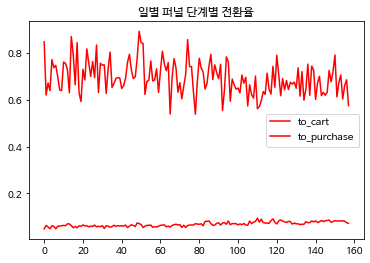

In [111]:
plt.figure(figsize=(10,10))
conversion_.plot(c='r')
plt.title("일별 퍼널 단계별 전환율");

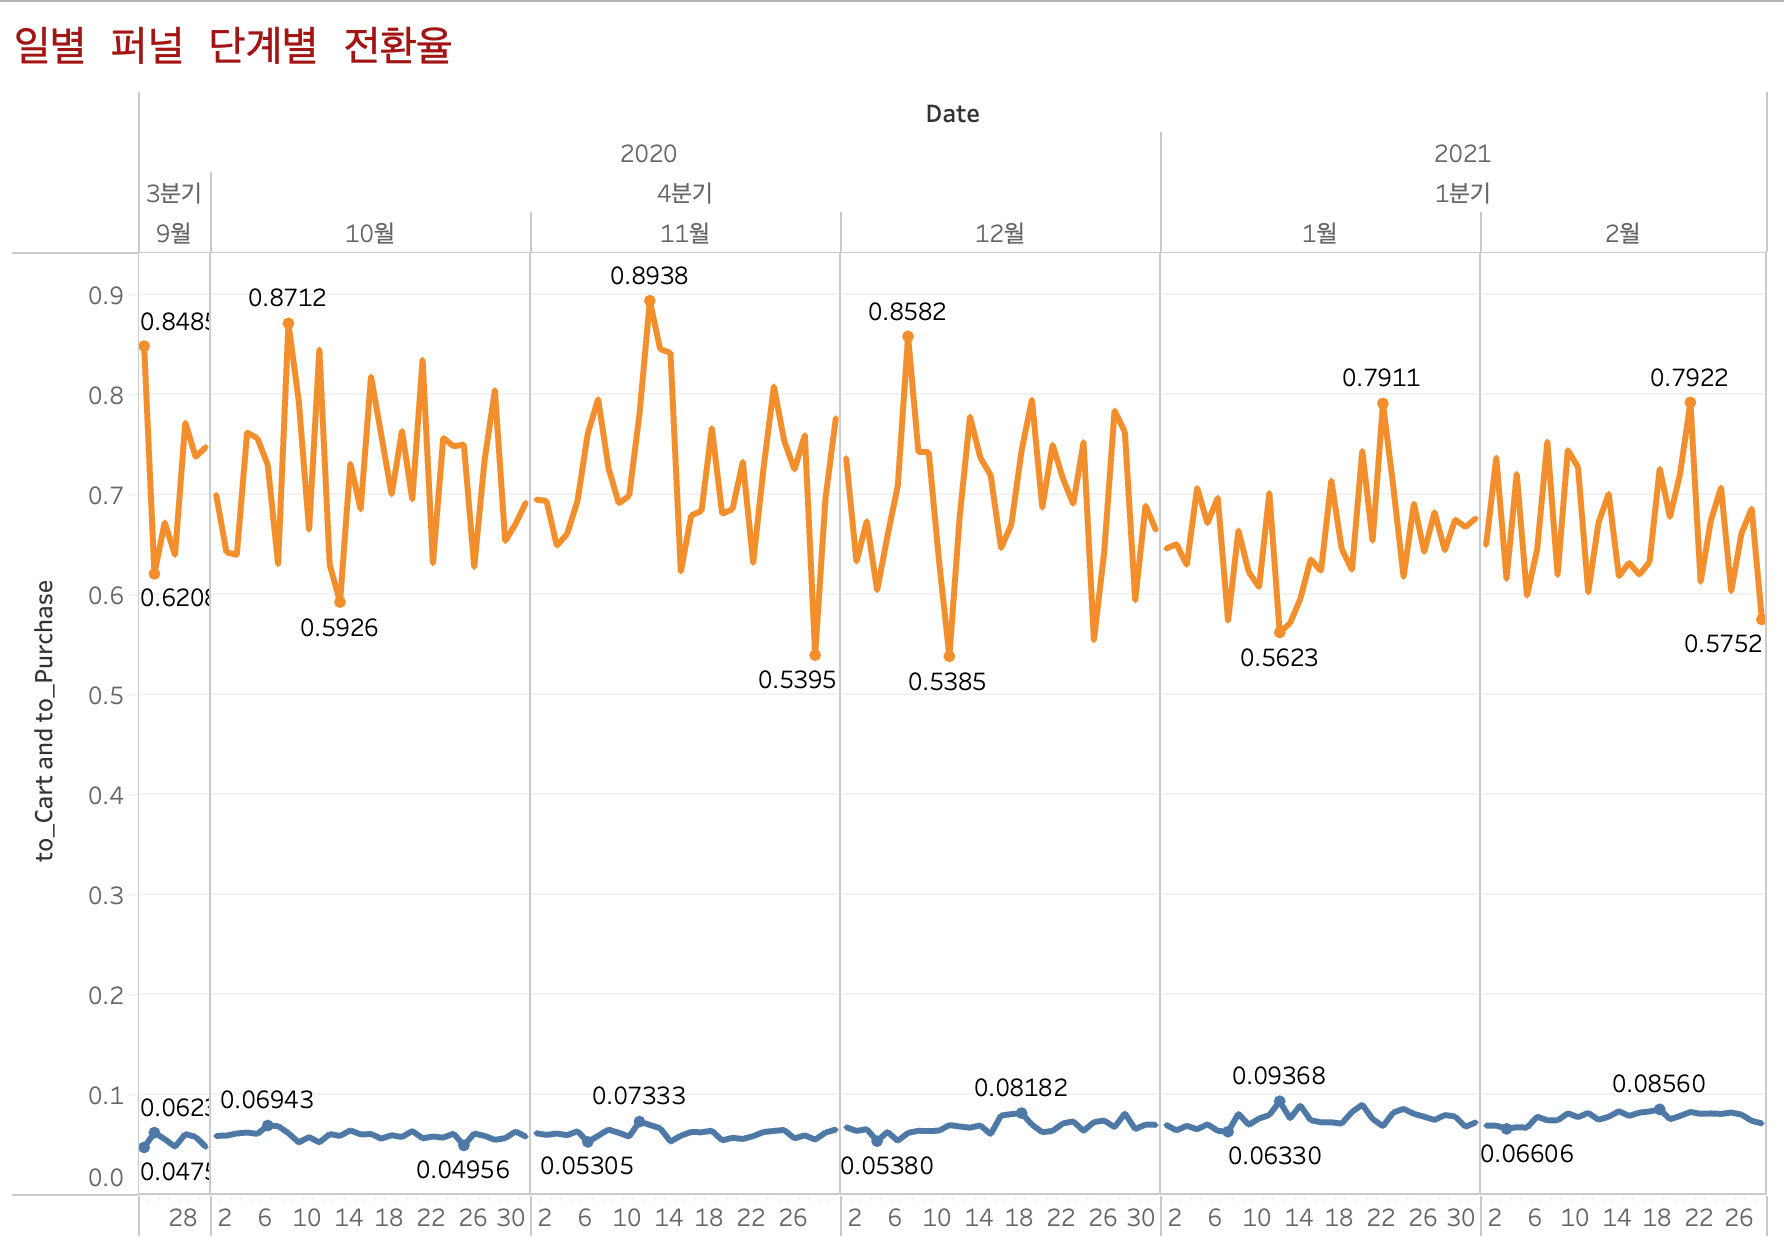

In [113]:
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion
0,0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06,electronics,telephone,NaN,2020-09-24 11:57:06,0 days 00:01:17,False,150.0000,New,new
1,1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler,2020-09-24 11:57:26,0 days 00:17:45,False,1392.0000,New,new
2,2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27,NaN,NaN,NaN,2020-09-24 11:57:27,3 days 01:03:40,New,13454.0000,New,new
3,3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.8100,1515915625519014356,aGFYrNgC08,2020-09-24,11:57:33,computers,peripherals,printer,2020-09-24 11:57:33,2 days 03:21:40,New,516.0000,New,new
4,4,2020-09-24 11:57:36,view,3658723,2144415921169498184,NaN,cameronsino,15.8700,1515915625510743344,aa4mmk0kwQ,2020-09-24,11:57:36,NaN,NaN,NaN,2020-09-24 11:57:36,11 days 22:16:15,New,6274.0000,New,new


#### 코호트 차트

- 동질 집단(코호트) 크기 : Weekly
- 측정 항목 : 유저 잔존율(재방문한 유저 비율)

In [149]:
df= pd.read_csv('/content/drive/MyDrive/data/e_commerce.csv',parse_dates=['date'])
df

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion
0,0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06,electronics,telephone,NaN,2020-09-24 11:57:06,0 days 00:01:17,False,150.0000,New,new
1,1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler,2020-09-24 11:57:26,0 days 00:17:45,False,1392.0000,New,new
2,2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27,NaN,NaN,NaN,2020-09-24 11:57:27,3 days 01:03:40,New,13454.0000,New,new
3,3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.8100,1515915625519014356,aGFYrNgC08,2020-09-24,11:57:33,computers,peripherals,printer,2020-09-24 11:57:33,2 days 03:21:40,New,516.0000,New,new
4,4,2020-09-24 11:57:36,view,3658723,2144415921169498184,NaN,cameronsino,15.8700,1515915625510743344,aa4mmk0kwQ,2020-09-24,11:57:36,NaN,NaN,NaN,2020-09-24 11:57:36,11 days 22:16:15,New,6274.0000,New,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885124,885124,2021-02-28 23:55:01,view,953226,2144415927553229037,NaN,NaN,219.9400,1515915625611023730,FRLqIttxKU,2021-02-28,23:55:01,NaN,NaN,NaN,2021-02-28 23:55:01,0 days 00:03:04,False,59.0000,New,new
885125,885125,2021-02-28 23:58:05,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.0300,1515915625611024014,g6WqPf50Ma,2021-02-28,23:58:05,electronics,video,tv,2021-02-28 23:58:05,0 days 00:00:04,False,284.0000,New,new
885126,885126,2021-02-28 23:58:09,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.9200,1515915625611024020,xNIJBqZdkd,2021-02-28,23:58:09,electronics,clocks,NaN,2021-02-28 23:58:09,0 days 00:00:05,False,6.0000,New,new
885127,885127,2021-02-28 23:58:14,view,888273,2144415921932861531,electronics.telephone,NaN,10.1600,1515915625611024030,9pCbKMIcSx,2021-02-28,23:58:14,electronics,telephone,NaN,2021-02-28 23:58:14,NaN,False,10.0000,New,new


In [150]:
start_date = df.groupby('user_id')['date'].min()
start_date = start_date.rename("start_day")
start_date.head()

user_id
1515915625353226922   2020-10-29
1515915625353230067   2020-10-06
1515915625353230683   2020-11-09
1515915625353230922   2020-10-02
1515915625353234047   2020-09-29
Name: start_day, dtype: datetime64[ns]

In [151]:
# Join start date
df = pd.merge(df, start_date, left_on='user_id', right_index=True)
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day
0,0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06,electronics,telephone,NaN,2020-09-24 11:57:06,0 days 00:01:17,False,150.0000,New,new,2020-09-24
1,1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler,2020-09-24 11:57:26,0 days 00:17:45,False,1392.0000,New,new,2020-09-24
83,83,2020-09-24 12:15:11,view,627054,2144415926806642904,computers.components.power_supply,NaN,54.5900,1515915625519380411,tdicluNnRY,2020-09-24,12:15:11,computers,components,power_supply,2020-09-24 12:15:11,0 days 00:04:46,False,0.0000,False,exist,2020-09-24
102,102,2020-09-24 12:19:57,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,12:19:57,computers,components,cooler,2020-09-24 12:19:57,1 days 02:00:06,New,0.0000,False,new,2020-09-24
2,2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27,NaN,NaN,NaN,2020-09-24 11:57:27,3 days 01:03:40,New,13454.0000,New,new,2020-09-24


In [152]:
df['days_since_start'] = (df['date'] - df['start_day']).dt.days
df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,days_since_start
0,0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06,electronics,telephone,NaN,2020-09-24 11:57:06,0 days 00:01:17,False,150.0000,New,new,2020-09-24,0
1,1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler,2020-09-24 11:57:26,0 days 00:17:45,False,1392.0000,New,new,2020-09-24,0
83,83,2020-09-24 12:15:11,view,627054,2144415926806642904,computers.components.power_supply,NaN,54.5900,1515915625519380411,tdicluNnRY,2020-09-24,12:15:11,computers,components,power_supply,2020-09-24 12:15:11,0 days 00:04:46,False,0.0000,False,exist,2020-09-24,0
102,102,2020-09-24 12:19:57,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,12:19:57,computers,components,cooler,2020-09-24 12:19:57,1 days 02:00:06,New,0.0000,False,new,2020-09-24,0
2,2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27,NaN,NaN,NaN,2020-09-24 11:57:27,3 days 01:03:40,New,13454.0000,New,new,2020-09-24,0


In [153]:
df['start_week'] = df.apply(lambda x: (x['start_day'] - pd.Timedelta(x['start_day'].dayofweek, u='date')).date(), axis=1)
df['start_week'] = pd.to_datetime(df['start_week'])
df['weeks_since_start'] = np.floor((df['date'] - df['start_week']) / np.timedelta64(1, 'W'))

In [154]:
# Extract start month
df['start_month'] = df['start_day'].values.astype('datetime64[M]')
# Get the number of months since the user started
df['months_since_start'] = np.floor((df['date'] - df['start_month']) / np.timedelta64(1, 'M'))

In [155]:
f1 = df['start_day'] < df['date'].max() - pd.Timedelta(days=7)
dff = df[f1]

In [156]:
df[['user_id', 'weeks_since_start']].head()

,user_id,weeks_since_start
0,1515915625519388267,0.0000
1,1515915625519380411,0.0000
83,1515915625519380411,0.0000
102,1515915625519380411,0.0000
2,1515915625513238515,0.0000


In [157]:
df.groupby('weeks_since_start')['user_id'].nunique().head()

weeks_since_start
0.0000    407283
1.0000      7324
2.0000      3915
3.0000      2612
4.0000      1934
Name: user_id, dtype: int64

In [158]:
df.groupby('weeks_since_start')['user_id'].nunique().head() / df['user_id'].nunique()

weeks_since_start
0.0000   1.0000
1.0000   0.0180
2.0000   0.0096
3.0000   0.0064
4.0000   0.0047
Name: user_id, dtype: float64

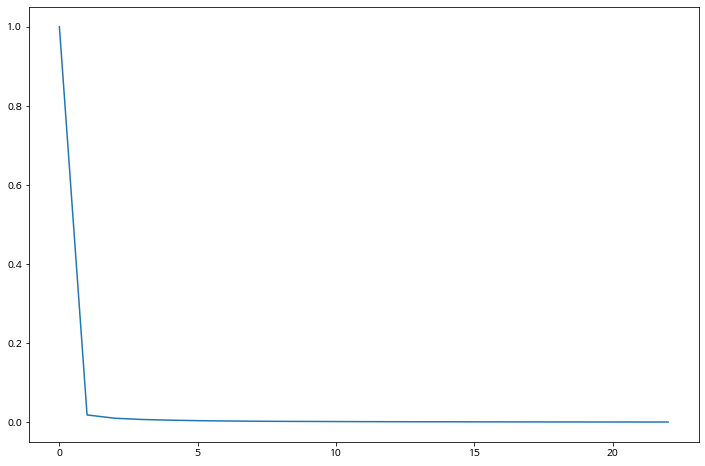

In [159]:
whole_retention = df.groupby('weeks_since_start')['user_id'].nunique() / df['user_id'].nunique()
plt.figure(figsize=(12,8))
plt.plot(whole_retention)

In [160]:
grouped = df.groupby(['start_week', 'date'])

주별 순 방문자수

In [161]:
cohorts = grouped['user_id'].nunique()
cohorts.head()

start_week  date      
2020-09-23  2020-09-24    1358
            2020-09-25      68
            2020-09-26      37
            2020-09-27      28
            2020-09-28      34
Name: user_id, dtype: int64

In [163]:
cohorts = cohorts.reset_index()
cohorts.rename({'user_id':'TotalUsers'},axis=1,inplace=True)
cohorts.head()

,index,start_week,date,TotalUsers
0,0,2020-09-23,2020-09-24,1358
1,1,2020-09-23,2020-09-25,68
2,2,2020-09-23,2020-09-26,37
3,3,2020-09-23,2020-09-27,28
4,4,2020-09-23,2020-09-28,34


In [164]:
each_period = cohorts['start_week'].value_counts().sort_index()
each_period

2020-09-23    111
2020-09-24    151
2020-09-25    103
2020-09-26     81
2020-09-28    138
             ... 
2021-02-23      5
2021-02-24      4
2021-02-25      3
2021-02-26      2
2021-02-27      1
Name: start_week, Length: 136, dtype: int64

In [165]:
cohorts[cohorts['start_week']=='2020-09-23']

,index,start_week,date,TotalUsers
0,0,2020-09-23,2020-09-24,1358
1,1,2020-09-23,2020-09-25,68
2,2,2020-09-23,2020-09-26,37
3,3,2020-09-23,2020-09-27,28
4,4,2020-09-23,2020-09-28,34
...,...,...,...,...
106,106,2020-09-23,2021-02-11,1
107,107,2020-09-23,2021-02-15,1
108,108,2020-09-23,2021-02-19,1
109,109,2020-09-23,2021-02-20,1


In [166]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [168]:
cohorts['CohortPeriod']=cohortperiod
cohorts.head()

,index,start_week,date,TotalUsers,CohortPeriod
0,0,2020-09-23,2020-09-24,1358,0
1,1,2020-09-23,2020-09-25,68,1
2,2,2020-09-23,2020-09-26,37,2
3,3,2020-09-23,2020-09-27,28,3
4,4,2020-09-23,2020-09-28,34,4


In [169]:
cohorts.set_index(['start_week','CohortPeriod'],inplace=True)
cohorts.head()

index       date  TotalUsers
start_week CohortPeriod                              
2020-09-23 0                 0 2020-09-24        1358
           1                 1 2020-09-25          68
           2                 2 2020-09-26          37
           3                 3 2020-09-27          28
           4                 4 2020-09-28          34

In [170]:
cohorts = cohorts['TotalUsers'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
start_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-23,1358.0000,68.0000,37.0000,28.0000,34.0000,23.0000,19.0000,20.0000,17.0000,13.0000,14.0000,9.0000,5.0000,9.0000,7.0000,9.0000,9.0000,5.0000,9.0000,5.0000,7.0000,8.0000,5.0000,6.0000,6.0000,5.0000,5.0000,6.0000,8.0000,4.0000,6.0000,4.0000,7.0000,2.0000,8.0000,5.0000,4.0000,4.0000,5.0000,3.0000,3.0000,7.0000,3.0000,2.0000,2.0000,3.0000,4.0000,3.0000,5.0000,2.0000,4.0000,4.0000,1.0000,5.0000,5.0000,4.0000,5.0000,4.0000,2.0000,2.0000,3.0000,2.0000,3.0000,3.0000,1.0000,3.0000,2.0000,1.0000,2.0000,4.0000,1.0000,1.0000,1.0000,2.0000,1.0000,2.0000,3.0000,3.0000,1.0000,3.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-24,2383.0000,86.0000,52.0000,55.0000,48.0000,46.0000,44.0000,49.0000,18.0000,18.0000,30.0000,27.0000,22.0000,21.0000,20.0000,17.0000,15.0000,24.0000,17.0000,14.0000,16.0000,12.0000,10.0000,16.0000,16.0000,21.0000,24.0000,13.0000,13.0000,7.0000,6.0000,13.0000,13.0000,15.0000,15.0000,10.0000,1.0000,5.0000,7.0000,5.0000,5.0000,10.0000,11.0000,5.0000,7.0000,9.0000,6.0000,9.0000,5.0000,6.0000,6.0000,3.0000,9.0000,6.0000,4.0000,5.0000,5.0000,2.0000,3.0000,8.0000,5.0000,7.0000,6.0000,4.0000,3.0000,1.0000,3.0000,4.0000,8.0000,3.0000,5.0000,4.0000,3.0000,4.0000,2.0000,3.0000,4.0000,3.0000,1.0000,2.0000,3.0000,5.0000,4.0000,4.0000,2.0000,2.0000,2.0000,3.0000,4.0000,3.0000,4.0000,3.0000,1.0000,3.0000,1.0000,3.0000,1.0000,3.0000,3.0000,3.0000,2.0000,1.0000,1.0000,3.0000,2.0000,4.0000,5.0000,3.0000,4.0000,4.0000,3.0000,2.0000,2.0000,5.0000,3.0000,1.0000,4.0000,1.0000,4.0000,3.0000,4.0000,3.0000,2.0000,2.0000,2.0000,4.0000,3.0000,4.0000,3.0000,2.0000,1.0000,3.0000,4.0000,3.0000,5.0000,3.0000,2.0000,1.0000,5.0000,5.0000,5.0000,3.0000,3.0000,3.0000,1.0000,2.0000,3.0000,4.0000,2.0000,2.0000,1.0000
2020-09-25,1907.0000,64.0000,34.0000,27.0000,10.0000,15.0000,18.0000,17.0000,16.0000,14.0000,7.0000,10.0000,11.0000,8.0000,5.0000,13.0000,5.0000,8.0000,9.0000,6.0000,4.0000,6.0000,5.0000,8.0000,5.0000,7.0000,8.0000,7.0000,9.0000,7.0000,4.0000,2.0000,1.0000,4.0000,3.0000,6.0000,5.0000,1.0000,3.0000,4.0000,5.0000,2.0000,3.0000,2.0000,2.0000,5.0000,5.0000,1.0000,3.0000,4.0000,3.0000,4.0000,5.0000,2.0000,3.0000,2.0000,3.0000,3.0000,2.0000,1.0000,2.0000,1.0000,3.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,2.0000,2.0000,2.0000,1.0000,2.0000,1.0000,1.0000,1.0000,3.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-26,2043.0000,77.0000,38.0000,34.0000,16.0000,20.0000,13.0000,12.0000,13.0000,13.0000,15.0000,10.0000,8.0000,5.0000,5.0000,8.0000,8.0000,9.0000,8.0000,5.0000,5.0000,5.0000,3.0000,6.0000,3.0000,4.0000,5.0000,5.0000,4.0000,2.0000,5.0000,2.0000,5.0000,3.0000,3.0000,8.0000,7.0000,1.0000,3.0000,3.0000,4.0000,1.0000,2.0000

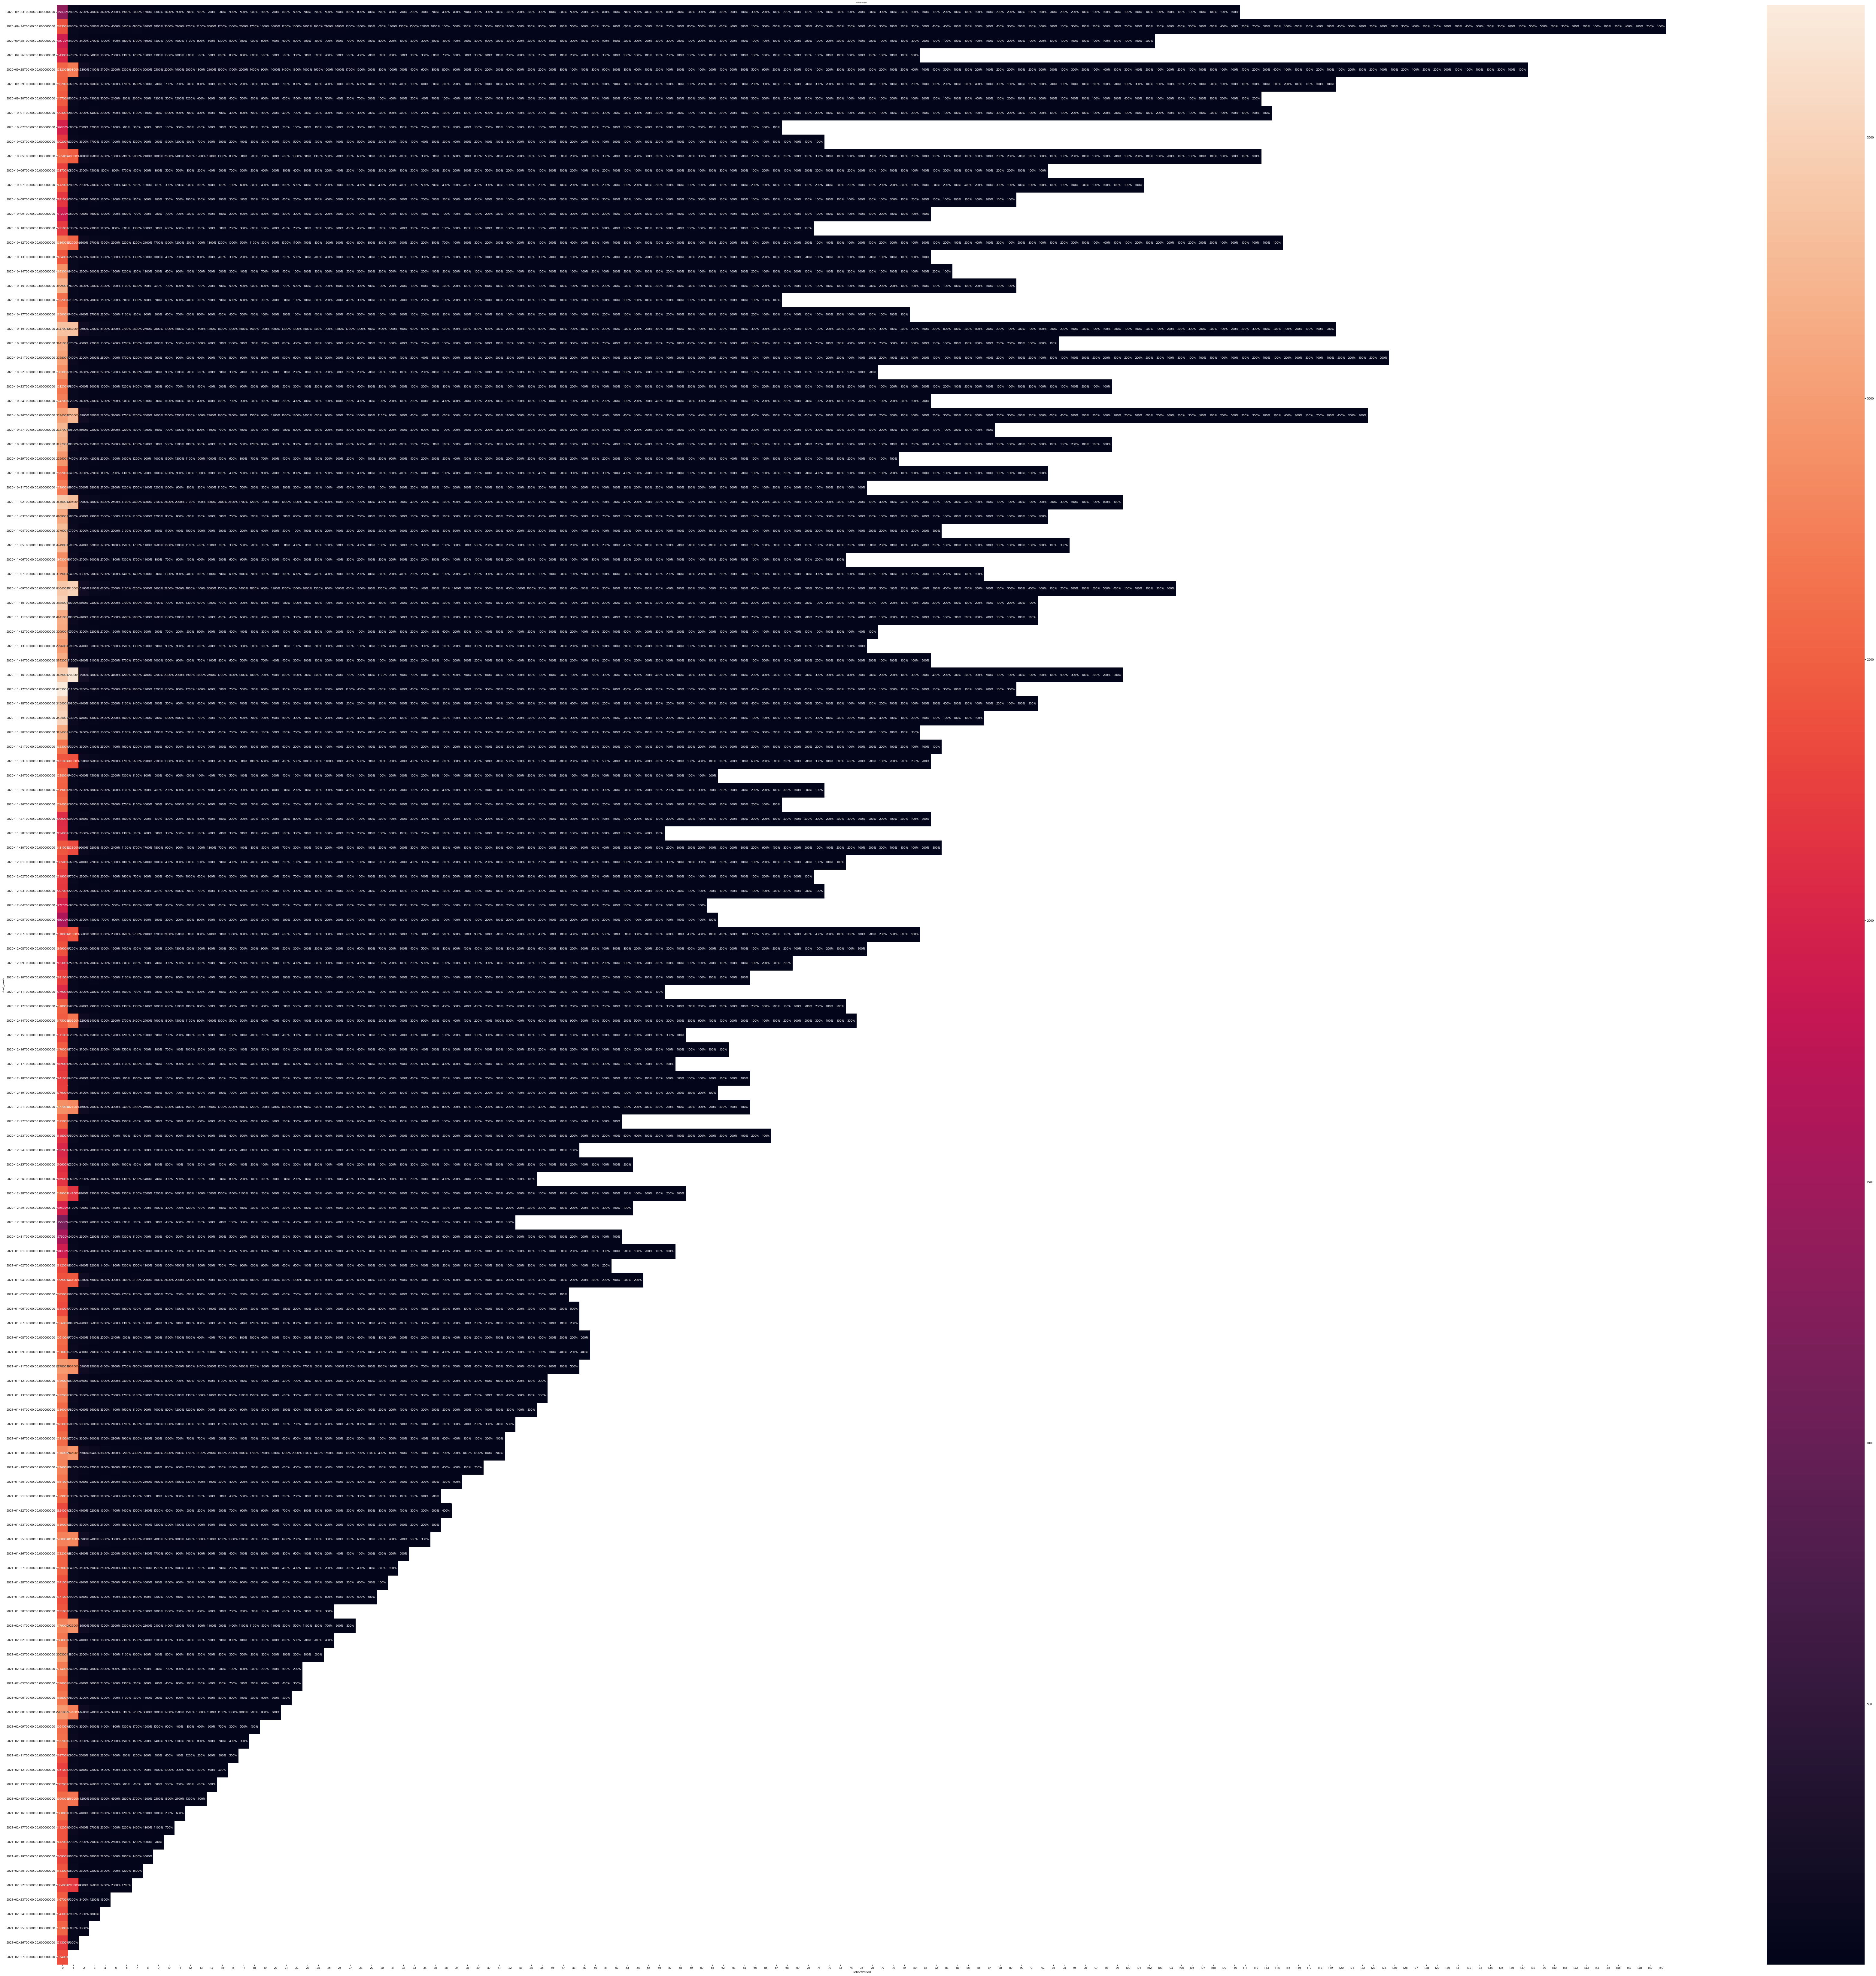

In [176]:
plt.figure(figsize=(120, 120))
plt.title('Cohort Analysis', fontsize=5)
sns.heatmap(cohorts, annot=True, fmt='.0%')
plt.show()

- 전체 데이터(cohorts)를 첫 코호트 기간의 순방문자(cohorts[0])로 나누어(divide) 주면 됩니다. 

- 이때, divide 함수에 axis=0을 명시해야 전체 데이터를 첫 코호트 기간의 데이터로 나눌 수 있습니다.

In [171]:
user_retention = cohorts.divide(cohorts[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
start_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-23,1.0000,0.0501,0.0272,0.0206,0.0250,0.0169,0.0140,0.0147,0.0125,0.0096,0.0103,0.0066,0.0037,0.0066,0.0052,0.0066,0.0066,0.0037,0.0066,0.0037,0.0052,0.0059,0.0037,0.0044,0.0044,0.0037,0.0037,0.0044,0.0059,0.0029,0.0044,0.0029,0.0052,0.0015,0.0059,0.0037,0.0029,0.0029,0.0037,0.0022,0.0022,0.0052,0.0022,0.0015,0.0015,0.0022,0.0029,0.0022,0.0037,0.0015,0.0029,0.0029,0.0007,0.0037,0.0037,0.0029,0.0037,0.0029,0.0015,0.0015,0.0022,0.0015,0.0022,0.0022,0.0007,0.0022,0.0015,0.0007,0.0015,0.0029,0.0007,0.0007,0.0007,0.0015,0.0007,0.0015,0.0022,0.0022,0.0007,0.0022,0.0007,0.0007,0.0007,0.0015,0.0007,0.0007,0.0007,0.0007,0.0015,0.0015,0.0007,0.0007,0.0007,0.0015,0.0015,0.0015,0.0007,0.0007,0.0007,0.0015,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,0.0007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-24,1.0000,0.0361,0.0218,0.0231,0.0201,0.0193,0.0185,0.0206,0.0076,0.0076,0.0126,0.0113,0.0092,0.0088,0.0084,0.0071,0.0063,0.0101,0.0071,0.0059,0.0067,0.0050,0.0042,0.0067,0.0067,0.0088,0.0101,0.0055,0.0055,0.0029,0.0025,0.0055,0.0055,0.0063,0.0063,0.0042,0.0004,0.0021,0.0029,0.0021,0.0021,0.0042,0.0046,0.0021,0.0029,0.0038,0.0025,0.0038,0.0021,0.0025,0.0025,0.0013,0.0038,0.0025,0.0017,0.0021,0.0021,0.0008,0.0013,0.0034,0.0021,0.0029,0.0025,0.0017,0.0013,0.0004,0.0013,0.0017,0.0034,0.0013,0.0021,0.0017,0.0013,0.0017,0.0008,0.0013,0.0017,0.0013,0.0004,0.0008,0.0013,0.0021,0.0017,0.0017,0.0008,0.0008,0.0008,0.0013,0.0017,0.0013,0.0017,0.0013,0.0004,0.0013,0.0004,0.0013,0.0004,0.0013,0.0013,0.0013,0.0008,0.0004,0.0004,0.0013,0.0008,0.0017,0.0021,0.0013,0.0017,0.0017,0.0013,0.0008,0.0008,0.0021,0.0013,0.0004,0.0017,0.0004,0.0017,0.0013,0.0017,0.0013,0.0008,0.0008,0.0008,0.0017,0.0013,0.0017,0.0013,0.0008,0.0004,0.0013,0.0017,0.0013,0.0021,0.0013,0.0008,0.0004,0.0021,0.0021,0.0021,0.0013,0.0013,0.0013,0.0004,0.0008,0.0013,0.0017,0.0008,0.0008,0.0004
2020-09-25,1.0000,0.0336,0.0178,0.0142,0.0052,0.0079,0.0094,0.0089,0.0084,0.0073,0.0037,0.0052,0.0058,0.0042,0.0026,0.0068,0.0026,0.0042,0.0047,0.0031,0.0021,0.0031,0.0026,0.0042,0.0026,0.0037,0.0042,0.0037,0.0047,0.0037,0.0021,0.0010,0.0005,0.0021,0.0016,0.0031,0.0026,0.0005,0.0016,0.0021,0.0026,0.0010,0.0016,0.0010,0.0010,0.0026,0.0026,0.0005,0.0016,0.0021,0.0016,0.0021,0.0026,0.0010,0.0016,0.0010,0.0016,0.0016,0.0010,0.0005,0.0010,0.0005,0.0016,0.0010,0.0005,0.0005,0.0005,0.0005,0.0005,0.0010,0.0010,0.0005,0.0010,0.0010,0.0010,0.0005,0.0010,0.0005,0.0005,0.0005,0.0016,0.0010,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0010,0.0005,0.0005,0.0010,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-26,1.0000,0.0377,0.0186,0.0166,0.0078,0.0098,0.0064,0.0059,0.0064,0.0064,0.0073,0.0049,0.0039,0.0024,0.0024,0.0039,0.0039,0.0044,0.0039,0.0024,0.0024,0.0024,0.0015,0.0029,0.0015,0.0020,0.0024,0.0024,0.0020,0.0010,0.0024,0.0010,0.0024,0.0015,0.0015,0.0039,0.0034,0.0005,0.0015,0.0015,0.0020,0.0005,0.0010,0.0010,0.0015,0.0010,0.0005,0.0005,0.0010,0.0010,0.0005,0.0015,0.0005,0.0005,0.

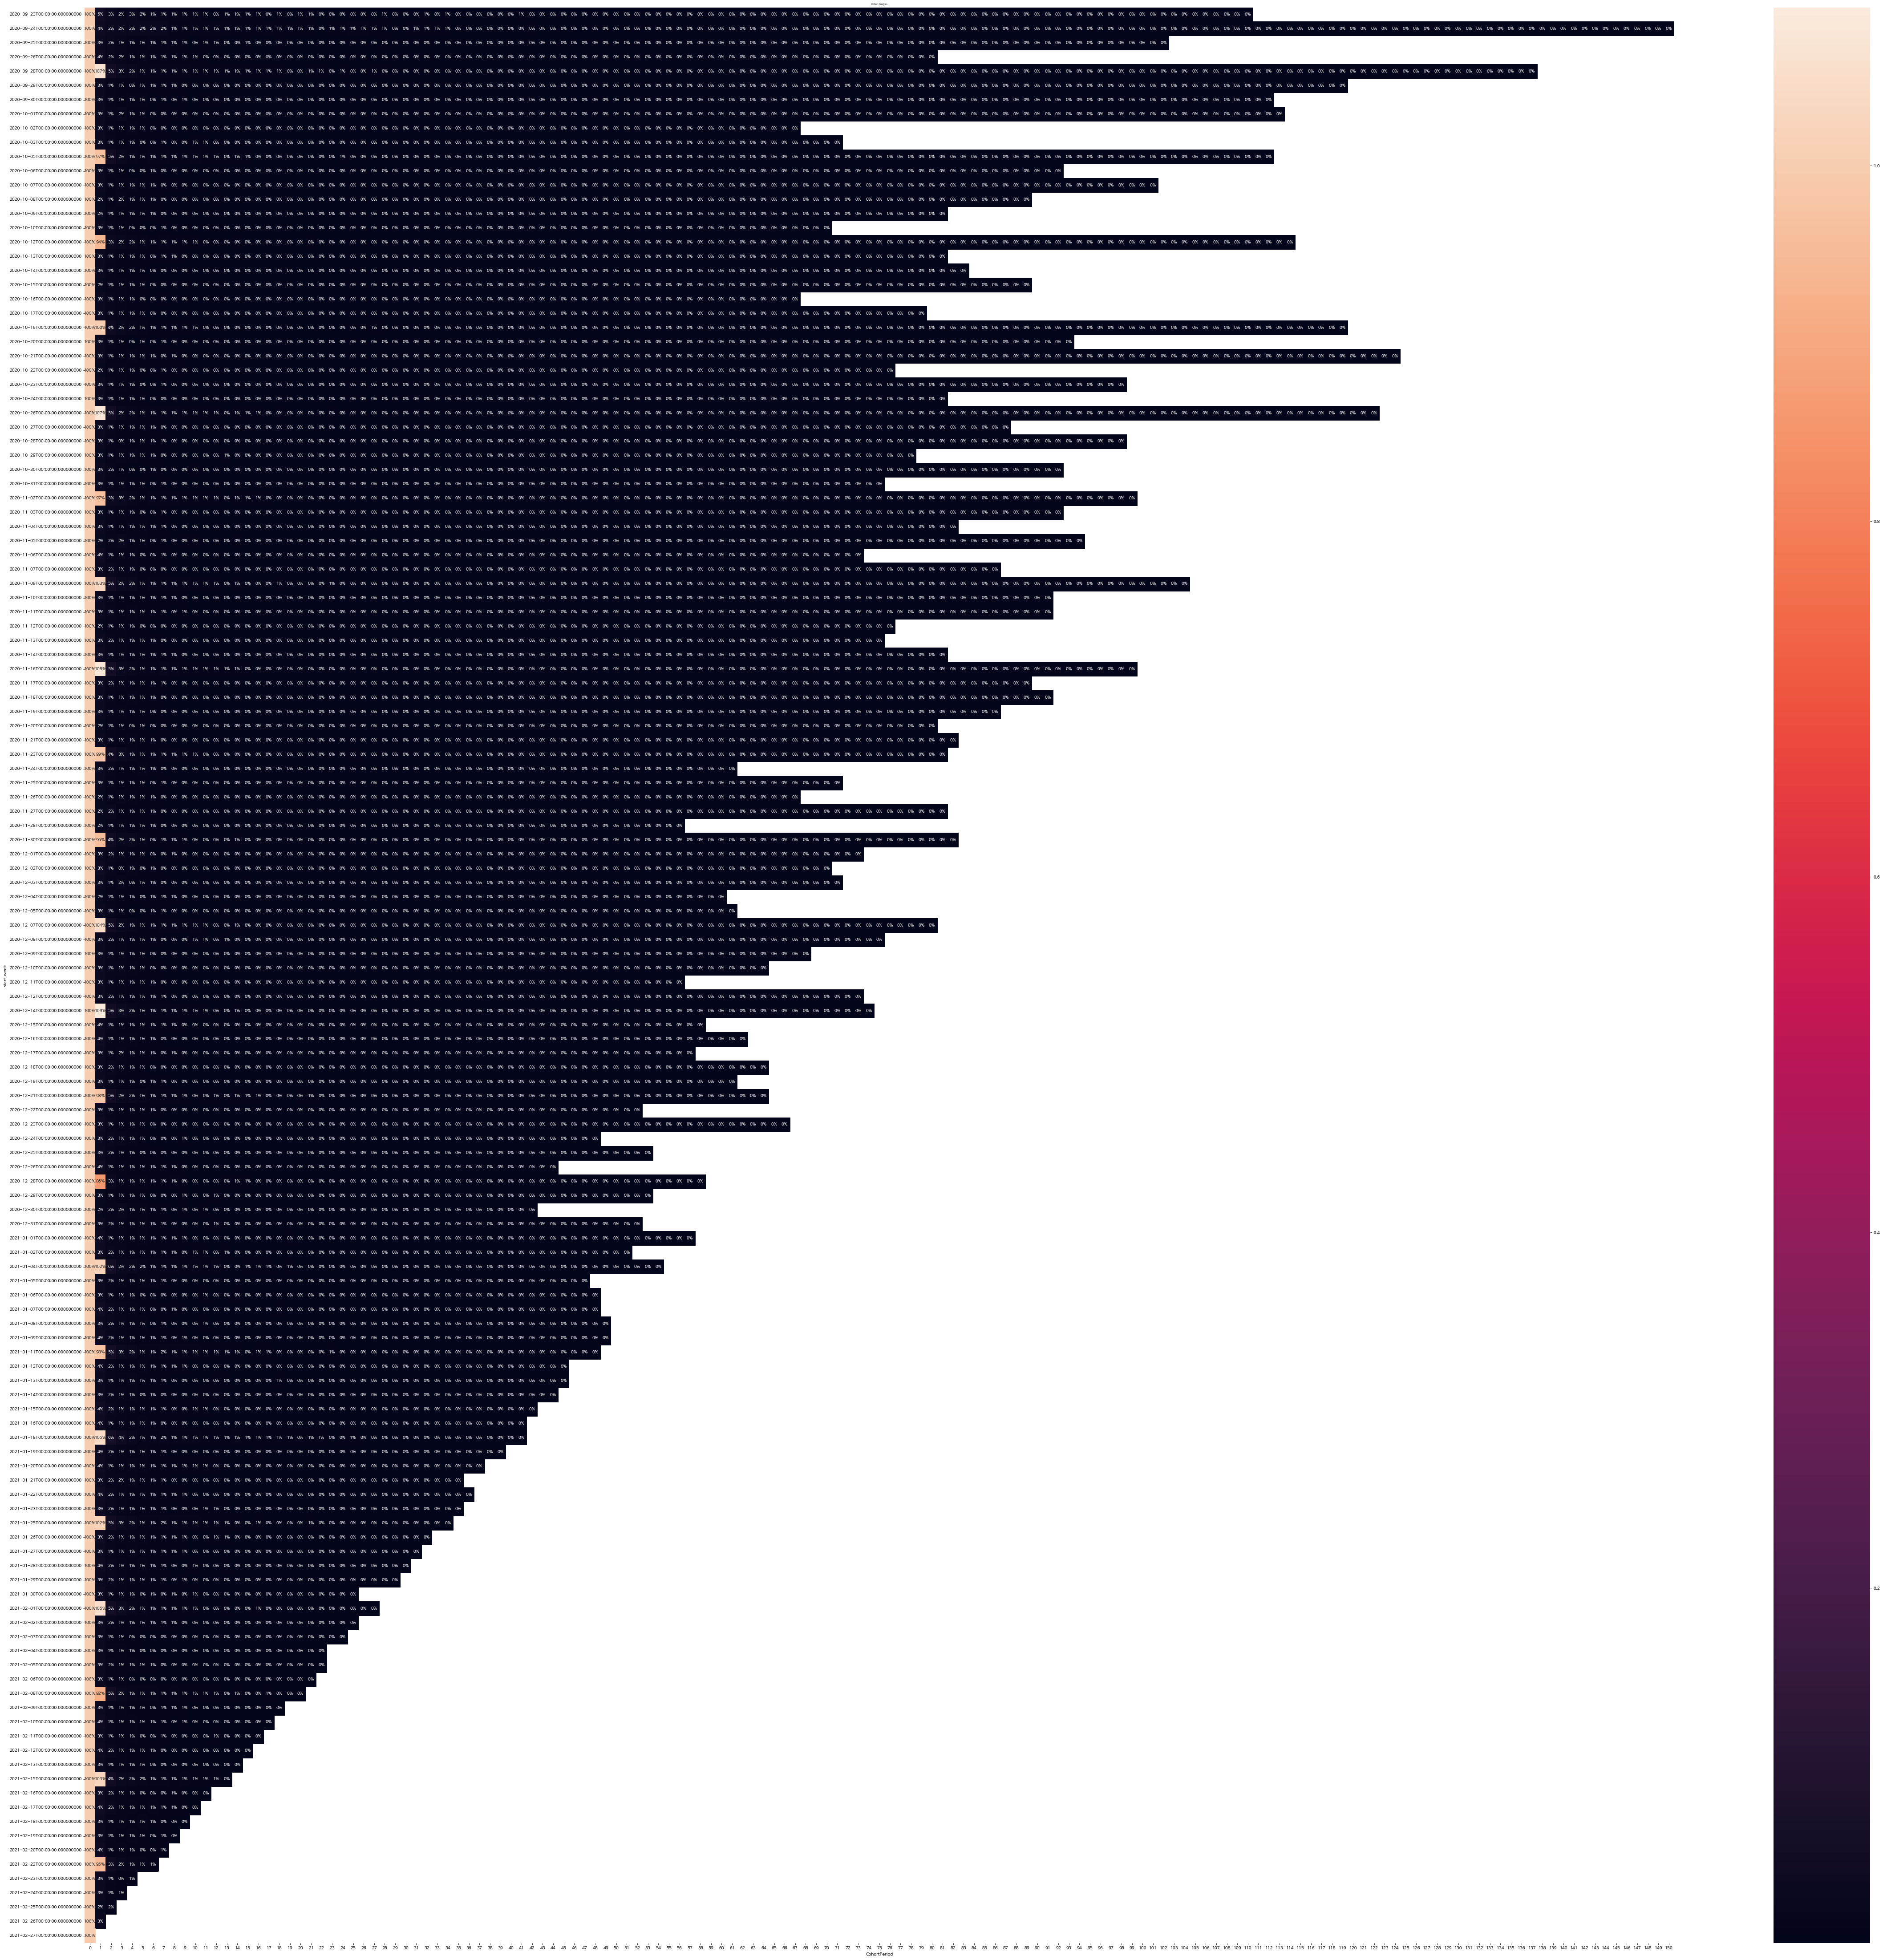

In [175]:
plt.figure(figsize=(120, 120))
plt.title('Cohort Analysis', fontsize=5)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.show()

#### 일별 전체 구매자 수, 재구매자 수, 평균 재구매주기를 구해주세요.

In [178]:
df

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,days_since_start,start_week,weeks_since_start,start_month,months_since_start
0,0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,NaN,31.9000,1515915625519388267,LJuJVLEjPT,2020-09-24,11:57:06,electronics,telephone,NaN,2020-09-24 11:57:06,0 days 00:01:17,False,150.0000,New,new,2020-09-24,0,2020-09-23,0.0000,2020-09-01,0.0000
1,1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,11:57:26,computers,components,cooler,2020-09-24 11:57:26,0 days 00:17:45,False,1392.0000,New,new,2020-09-24,0,2020-09-23,0.0000,2020-09-01,0.0000
83,83,2020-09-24 12:15:11,view,627054,2144415926806642904,computers.components.power_supply,NaN,54.5900,1515915625519380411,tdicluNnRY,2020-09-24,12:15:11,computers,components,power_supply,2020-09-24 12:15:11,0 days 00:04:46,False,0.0000,False,exist,2020-09-24,0,2020-09-23,0.0000,2020-09-01,0.0000
102,102,2020-09-24 12:19:57,view,139905,2144415926932472027,computers.components.cooler,zalman,17.1600,1515915625519380411,tdicluNnRY,2020-09-24,12:19:57,computers,components,cooler,2020-09-24 12:19:57,1 days 02:00:06,New,0.0000,False,new,2020-09-24,0,2020-09-23,0.0000,2020-09-01,0.0000
2,2,2020-09-24 11:57:27,view,215454,2144415927158964449,NaN,NaN,9.8100,1515915625513238515,4TMArHtXQy,2020-09-24,11:57:27,NaN,NaN,NaN,2020-09-24 11:57:27,3 days 01:03:40,New,13454.0000,New,new,2020-09-24,0,2020-09-23,0.0000,2020-09-01,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885123,885123,2021-02-28 23:54:18,view,3829355,2144415922528452715,electronics.telephone,NaN,32.2200,1515915625611023671,wZb7gP1zgN,2021-02-28,23:54:18,electronics,telephone,NaN,2021-02-28 23:54:18,0 days 00:00:43,False,90.0000,New,new,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000
885124,885124,2021-02-28 23:55:01,view,953226,2144415927553229037,NaN,NaN,219.9400,1515915625611023730,FRLqIttxKU,2021-02-28,23:55:01,NaN,NaN,NaN,2021-02-28 23:55:01,0 days 00:03:04,False,59.0000,New,new,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000
885125,885125,2021-02-28 23:58:05,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.0300,1515915625611024014,g6WqPf50Ma,2021-02-28,23:58:05,electronics,video,tv,2021-02-28 23:58:05,0 days 00:00:04,False,284.0000,New,new,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000
885126,885126,2021-02-28 23:58:09,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.9200,1515915625611024020,xNIJBqZdkd,2021-02-28,23:58:09,electronics,clocks,NaN,2021-02-28 23:58:09,0 days 00:00:05,False,6.0000,New,new,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000


- 일별 전체 구매자 수 

In [197]:
dataset = pd.DataFrame(df, columns=['event_type', 'date', 'user_id'])
  
# using groupby() function on Group column
df2 = dataset.groupby(['date','event_type'], as_index=False)['user_id'].size()
df2 = df2.pivot(index='date',columns='event_type',values='size').fillna(0)
df2

event_type,cart,purchase,view
date,,,
2020-09-24,99,84,2082
2020-09-25,240,149,3852
2020-09-26,177,119,3169
2020-09-27,172,110,3569
2020-09-28,259,200,4255
...,...,...,...
2021-02-24,413,292,5098
2021-02-25,411,248,4988
2021-02-26,416,275,5173


In [268]:
df2.to_csv('/content/drive/MyDrive/DATA/re_purchase_per_day.csv')

- 재 구매자 수 

먼저 purchase 따로 분리

In [257]:
df_pu = df['event_type'] == 'purchase'
df_pu = df[df_pu]

print(df_pu.shape)
df_pu = df_pu.sort_values(by=['user_id', 'date'] ,ascending=True)

(37346, 27)


In [260]:
# 앞의행 값을 뺐는데(user_id) 0이다 => 같은 user다 => 재구매를 했다.
df_pu['Re'] = df_pu['user_id'].diff().fillna(1.0)
df_pu['Re_purchase'] = np.where( df_pu.Re == 0, 'Re_P', 'just')

In [261]:
re_purchase_user = df_pu['Re_purchase'] == 'Re_P'
re_purchase_user = df_pu[re_purchase_user]
re_purchase_user

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,days_since_start,start_week,weeks_since_start,start_month,months_since_start,Re,Re_purchase
52165,52165,2020-10-06 10:03:42,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:03:42,electronics,tablet,NaN,2020-10-06 10:03:42,0 days 00:23:51,False,0.0000,False,exist,2020-10-06,0,2020-10-05,0.0000,2020-10-01,0.0000,0.0000,Re_P
52291,52291,2020-10-06 10:29:25,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:29:25,electronics,tablet,NaN,2020-10-06 10:29:25,0 days 00:00:20,False,0.0000,False,exist,2020-10-06,0,2020-10-05,0.0000,2020-10-01,0.0000,0.0000,Re_P
349275,349275,2020-11-25 09:24:42,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.8600,1515915625353561691,UmL0qYoQh4,2020-11-25,09:24:42,computers,peripherals,wifi,2020-11-25 09:24:42,0 days 00:02:17,False,0.0000,False,exist,2020-11-24,1,2020-11-23,0.0000,2020-11-01,0.0000,0.0000,Re_P
90695,90695,2020-10-15 05:09:35,purchase,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.7500,1515915625353900095,12dadbda-acb5-4f26-a5e8-f71814190c04,2020-10-15,05:09:35,computers,peripherals,camera,2020-10-15 05:09:35,0 days 03:19:29,New,0.0000,False,new,2020-09-27,18,2020-09-26,2.0000,2020-09-01,1.0000,0.0000,Re_P
3568,3568,2020-09-25 08:43:04,purchase,3580373,2144415937770553861,stationery.stapler,p.i.t,51.6800,1515915625354561351,M4JERvJr9C,2020-09-25,08:43:04,stationery,stapler,NaN,2020-09-25 08:43:04,2 days 06:04:44,New,0.0000,False,new,2020-09-25,0,2020-09-24,0.0000,2020-09-01,0.0000,0.0000,Re_P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884548,884548,2021-02-28 20:27:04,purchase,3537468,2144415922427789416,computers.components.videocards,palit,298.7600,1515915625610991774,8VK2CZNQKy,2021-02-28,20:27:04,computers,components,videocards,2021-02-28 20:27:04,-1 days +23:52:24,False,0.0000,False,exist,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000,0.0000,Re_P
884790,884790,2021-02-28 21:20:30,purchase,4102739,2144415922427789416,computers.components.videocards,msi,294.4100,1515915625610997879,E3YhAizTuM,2021-02-28,21:20:30,computers,components,videocards,2021-02-28 21:20:30,0 days 00:01:03,False,0.0000,False,exist,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000,0.0000,Re_P
884795,884795,2021-02-28 21:21:33,purchase,4102739,2144415922427789416,computers.components.videocards,msi,294.4100,1515915625610997879,E3YhAizTuM,2021-02-28,21:21:33,computers,components,videocards,2021-02-28 21:21:33,-1 days +23:24:19,False,0.0000,False,exist,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000,0.0000,Re_P
884725,884725,2021-02-28 21:03:01,purchase,4101564,2144415922427789416,computers.components.videocards,gigabyte,481.5400,1515915625610999486,MaSVGxo9Dm,2021-02-28,21:03:01,computers,components,videocards,2021-02-28 21:03:01,0 days 00:01:58,False,0.0000,False,exist,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000,0.0000,Re_P


In [262]:
re_purchase_user = pd.DataFrame(re_purchase_user, columns=['event_time','product_id','event_type', 'date','date_', 'user_id','Re_purchase'])
re_purchase_user

,event_time,product_id,event_type,date,date_,user_id,Re_purchase
52165,2020-10-06 10:03:42,1428321,purchase,2020-10-06,2020-10-06 10:03:42,1515915625353534622,Re_P
52291,2020-10-06 10:29:25,1428321,purchase,2020-10-06,2020-10-06 10:29:25,1515915625353534622,Re_P
349275,2020-11-25 09:24:42,1507368,purchase,2020-11-25,2020-11-25 09:24:42,1515915625353561691,Re_P
90695,2020-10-15 05:09:35,1795171,purchase,2020-10-15,2020-10-15 05:09:35,1515915625353900095,Re_P
3568,2020-09-25 08:43:04,3580373,purchase,2020-09-25,2020-09-25 08:43:04,1515915625354561351,Re_P
...,...,...,...,...,...,...,...
884548,2021-02-28 20:27:04,3537468,purchase,2021-02-28,2021-02-28 20:27:04,1515915625610991774,Re_P
884790,2021-02-28 21:20:30,4102739,purchase,2021-02-28,2021-02-28 21:20:30,1515915625610997879,Re_P
884795,2021-02-28 21:21:33,4102739,purchase,2021-02-28,2021-02-28 21:21:33,1515915625610997879,Re_P
884725,2021-02-28 21:03:01,4101564,purchase,2021-02-28,2021-02-28 21:03:01,1515915625610999486,Re_P


- 재 구매자 수는 16042명 



---



- 평균 재 구매 주기

In [263]:
temp = df_pu.copy()
temp['date_'] = pd.to_datetime(temp.event_time, format="%Y/%m/%d %H:%M:%S")
temp['diff_'] = temp.date_.diff().fillna('NaT')

In [264]:
temp.Re_purchase.value_counts()

just    21304
Re_P    16042
Name: Re_purchase, dtype: int64

In [265]:
df_purchase = temp['Re_purchase'] == 'Re_P'
df_purchase = temp[df_purchase]
df_purchase

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,time,main_category,mdi_category,sub_category,date_,diff,check_,coh,new_session,New_sessoion,start_day,days_since_start,start_week,weeks_since_start,start_month,months_since_start,Re,Re_purchase,diff_
52165,52165,2020-10-06 10:03:42,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:03:42,electronics,tablet,NaN,2020-10-06 10:03:42,0 days 00:23:51,False,0.0000,False,exist,2020-10-06,0,2020-10-05,0.0000,2020-10-01,0.0000,0.0000,Re_P,0 days 00:01:47
52291,52291,2020-10-06 10:29:25,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.0500,1515915625353534622,mNGo9YKWcw,2020-10-06,10:29:25,electronics,tablet,NaN,2020-10-06 10:29:25,0 days 00:00:20,False,0.0000,False,exist,2020-10-06,0,2020-10-05,0.0000,2020-10-01,0.0000,0.0000,Re_P,0 days 00:25:43
349275,349275,2020-11-25 09:24:42,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.8600,1515915625353561691,UmL0qYoQh4,2020-11-25,09:24:42,computers,peripherals,wifi,2020-11-25 09:24:42,0 days 00:02:17,False,0.0000,False,exist,2020-11-24,1,2020-11-23,0.0000,2020-11-01,0.0000,0.0000,Re_P,0 days 15:47:20
90695,90695,2020-10-15 05:09:35,purchase,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.7500,1515915625353900095,12dadbda-acb5-4f26-a5e8-f71814190c04,2020-10-15,05:09:35,computers,peripherals,camera,2020-10-15 05:09:35,0 days 03:19:29,New,0.0000,False,new,2020-09-27,18,2020-09-26,2.0000,2020-09-01,1.0000,0.0000,Re_P,0 days 00:00:00
3568,3568,2020-09-25 08:43:04,purchase,3580373,2144415937770553861,stationery.stapler,p.i.t,51.6800,1515915625354561351,M4JERvJr9C,2020-09-25,08:43:04,stationery,stapler,NaN,2020-09-25 08:43:04,2 days 06:04:44,New,0.0000,False,new,2020-09-25,0,2020-09-24,0.0000,2020-09-01,0.0000,0.0000,Re_P,0 days 00:03:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884548,884548,2021-02-28 20:27:04,purchase,3537468,2144415922427789416,computers.components.videocards,palit,298.7600,1515915625610991774,8VK2CZNQKy,2021-02-28,20:27:04,computers,components,videocards,2021-02-28 20:27:04,-1 days +23:52:24,False,0.0000,False,exist,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000,0.0000,Re_P,0 days 00:06:39
884790,884790,2021-02-28 21:20:30,purchase,4102739,2144415922427789416,computers.components.videocards,msi,294.4100,1515915625610997879,E3YhAizTuM,2021-02-28,21:20:30,computers,components,videocards,2021-02-28 21:20:30,0 days 00:01:03,False,0.0000,False,exist,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000,0.0000,Re_P,0 days 00:33:13
884795,884795,2021-02-28 21:21:33,purchase,4102739,2144415922427789416,computers.components.videocards,msi,294.4100,1515915625610997879,E3YhAizTuM,2021-02-28,21:21:33,computers,components,videocards,2021-02-28 21:21:33,-1 days +23:24:19,False,0.0000,False,exist,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000,0.0000,Re_P,0 days 00:01:03
884725,884725,2021-02-28 21:03:01,purchase,4101564,2144415922427789416,computers.components.videocards,gigabyte,481.5400,1515915625610999486,MaSVGxo9Dm,2021-02-28,21:03:01,computers,components,videocards,2021-02-28 21:03:01,0 days 00:01:58,False,0.0000,False,exist,2021-02-28,0,2021-02-27,0.0000,2021-02-01,0.0000,0.0000,Re_P,0 days 00:01:09


In [266]:
df_purchase['diff_'].mean()

Timedelta('1 days 00:08:24.440468769')

In [269]:
df_purchase.to_csv('/content/drive/MyDrive/DATA/df_purchase.csv')